# Battle of the Neighborhoods : Exploring Afro-Caribbean Venues in Toronto and London

Kwaku Boakye

November 9, 2020

## 1.0 Introduction

 The consensus that is out there is that London and Toronto are two cities with uncanny similarity. Many assert that this public acclaim is nothing more than an urban myth while believers of this notion point to several linkages between the two cities. These two megacities are both considered financial strongholds of their countries. Adding to the obvious strong economy, these two countries are melting pots for different cultures.

More specifically, one can observe the ubiquity of the Afro-Caribbean cultures like Jamaica, Trinidad, Ghana, and Nigeria that exist in certain pockets of the city. An attempt is made here to gain further understanding of the neighborhoods that exist in these cities by analyzing them using clustering techniques.

## 2.0 Business Problem

 The purpose of this report is to serve as a reliable guide for travel enthusiasts who would like to explore the similar afro-Caribbean centers that may exist in these two cities. Additionally, after performing this analysis it will provide a reliable source to draw parallels between these two cities giving stakeholders the opportunity to make smart business decisions on what areas to establish Afro-Caribbean specific business ventures.

## 3.0 Data Description

This project will be using public data that has been scrapped from Wikipedia as well as leverage data from the Foursquare API. The Foursquare will allow the use of the explore function to get the most common venue categories in each neighborhood and then use this feature to group the neighborhoods into clusters. For Geolocation data, the Geocoder python package will help in providing the necessary latitude and longitude using the postal codes of the different neighborhoods in both cities.
Moreover, the two distinct datasets that are going to be used are going to need some preprocessing.


## 3.1 Toronto

The main source of the data that is used for the Toronto analysis is to be scrapped from the Wikipedia webpage: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M  

This Webpage has major categories of data that is needed explore and cluster the neighbohods in Toronto. The data derived is needs to be wrangled and cleaned before it can be read into a Pandas dataframe which provide as platfrom to perform any type of statiscal anlysis. The Toronto datafram will have three main columns namely: 
* 1. PostalCode : Postal codes for the different neighborhoods
* 2. Borough : Name of borough
* 3. Neighborhood : Name of neighborhood 

Only cells with assigned neighborhoods will be processed while "not assigned" cells will be promptly dropped.



## 3.2 London

For the London dataset it is going to be scrapped from the Wikipedia page: https://en.wikipedia.org/wiki/List_of_areas_of_London
Due to the fact that this webpage has information about areas that are not going to be considered in this project we limit the scope of this dataset to pertain just to London.
The data will be limited to three main columns namely:
* 1. borough : Name of Neighbourhood
* 2. town : Name of borough
* 3. post_code : Postal codes for London.



## 3.3 Foursquare API Data

The Foursquare API data will aid in providing the necessary data about the different venues in each neighborhood of each respective city. The locational information that is going to be provided by Foursquare which will give us access to “precise, up-to-date community-sourced venue data”. Venue names, locations, menus, and photos, and if we are looking to be more elaborate Foursquare can provide the star rating as well as reviews of different venues. The information going to be retrieved from Foursquare with regards to venue data should be sufficient enough to be used in the analysis of the different neighborhoods.

When we connect to the Foursquare API we will limit the radius of each neighborhood to 500 meters

The data retrieved from Foursquare contained information of venues within a specified distance of the longitude and latitude of the postcodes. The information obtained per venue as follows:
* Neighborhood : Name of the Neighborhood
* Neighborhood Latitude : Latitude of the Neighborhood
* Neighborhood Longitude : Longitude of the Neighborhood
* Venue : Name of the Venue
* Venue Latitude : Latitude of Venue
* Venue Longitude : Longitude of Venue
* Venue Category : Category of Venue


## 4.0 Methodology

The model that is going to be built will cluster the neighborhoods together based on similar venue categories. We then present our observations and findings.

Before we start building this model we must first import the necessary python packages.

In [ ]:
# importing neccessary libraries

import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage

from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

! pip install beautifulsoup4
from bs4 import BeautifulSoup

!pip install lxml
import lxml
!pip install html5lib

print('Libraries imported.')

### 4.1 Downloading and Scraping Data from Wikipedia Page
After the required python packages have been downloaded and or installed we scrape Toronto and London neighborhood data from their respective wikipedia page.

#### 4.1.1 Toronto Neighborhood Data

In [3]:
# download data and parse it:
req = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')
soup = BeautifulSoup(req.text, 'html.parser')
table = soup.find_all('table')[0]
df = pd.read_html(str(table))

df1=pd.DataFrame(df[0])
df1.head()


,Postal Code,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


This data will need to be preprocessed before it can be used.

#### 4.1.2 London Neighborhood Data

In [4]:
# download London data and parse it:
url_london = "https://en.wikipedia.org/wiki/List_of_areas_of_London"
wiki_london_url = requests.get(url_london)
wiki_london_data = pd.read_html(wiki_london_url.text)
df_lon = wiki_london_data[1]
df_lon


,Location,London borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728
...,...,...,...,...,...,...
527,Woolwich,Greenwich,LONDON,SE18,020,TQ435795
528,Worcester Park,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4,020,TQ225655
529,Wormwood Scrubs,Hammersmith and Fulham,LONDON,W12,020,TQ225815
530,Yeading,Hillingdon,HAYES,UB4,020,TQ115825


Similar to the Toronto data before, the London data will need to be preprocessed

### 4.3 Data Preprocessing
Both the Toronto and the London data are going to be refined, removing unnecessary columns, renaming columns also resetting the indexes. 

In [5]:
# drop Boroughs that are "Not assigned" in the Toronto data
df2=df1.drop(df1[(df1.Borough == "Not assigned")].index)

# rename column "Postal Code" to "Postcode" and "Neighbourhood" to "Neighborhood"
df2.rename(columns={'Postal Code':'Postcode'}, inplace=True)
df2.rename(columns={'Neighbourhood':'Neighborhood'}, inplace=True)
df2.head()


,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [6]:
# For the London data , We attempt to replace the spaces with underscores in the title. 
df_lon.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)


### 4.4.1 Feature Selection
Under feature selection, we only select the relevant columns that is going to be used clustering of the data. The columns that are going to be selected are the borough, neighbourhood, postal codes. We also need the geolocation data i.e latitude and longitude and that will be added shortly.


In [7]:
# selecting relevant columns from the london data
df_lon1 = df_lon.drop( [ df_lon.columns[0], df_lon.columns[4], df_lon.columns[5] ], axis=1)
df_lon1

,London borough,Post_town,Postcode district
0,"Bexley, Greenwich [7]",LONDON,SE2
1,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4"
2,Croydon[8],CROYDON,CR0
3,Croydon[8],CROYDON,CR0
4,Bexley,"BEXLEY, SIDCUP","DA5, DA14"
...,...,...,...
527,Greenwich,LONDON,SE18
528,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4
529,Hammersmith and Fulham,LONDON,W12
530,Hillingdon,HAYES,UB4


In [8]:
# rename the columns
df_lon1.columns = ['borough','town','post_code']
df_lon1

,borough,town,post_code
0,"Bexley, Greenwich [7]",LONDON,SE2
1,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4"
2,Croydon[8],CROYDON,CR0
3,Croydon[8],CROYDON,CR0
4,Bexley,"BEXLEY, SIDCUP","DA5, DA14"
...,...,...,...
527,Greenwich,LONDON,SE18
528,"Sutton, Kingston upon Thames",WORCESTER PARK,KT4
529,Hammersmith and Fulham,LONDON,W12
530,Hillingdon,HAYES,UB4


### 4.4.2 Feature engineeering
For the London data most espeiallly we identify that the data that is returned is that of other cities that are not being considered in this project. As a result we attempt to further refine the data to only london city data.

In [9]:
# selecting only the neighbourhoods pertaining to 'London'
df_lon1 = df_lon1[df_lon1['town'].str.contains('LONDON')]
df_lon1

,borough,town,post_code
0,"Bexley, Greenwich [7]",LONDON,SE2
1,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4"
6,City[10],LONDON,EC3
7,Westminster[10],LONDON,WC2
9,Bromley[11],LONDON,SE20
...,...,...,...
522,Redbridge,LONDON,"IG8, E18"
523,"Redbridge, Waltham Forest","LONDON, WOODFORD GREEN",IG8
526,Barnet,LONDON,N12
527,Greenwich,LONDON,SE18


### 4.5 Adding Geo-spatial data
We find the geo-spatial data for the respective postal codes. First we tackle the Toronto dataset

In [10]:
# add Geo-spatial data to the Toronoto data and merge the two datasets
dfll= pd.read_csv("http://cocl.us/Geospatial_data")
dfll.rename(columns={'Postal Code':'Postcode'}, inplace=True) # 'Postal Code' cloumn is rename 'Postcode' for simplicity in analysis
dfll.set_index("Postcode") # The dataframe index is set to the column 'Postcode'
df2.set_index("Postcode")
toronto_data=pd.merge(df2, dfll) # merging the two datasets
toronto_data.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [11]:
# request shape to know number of colums and rows of the Toronto dataset
toronto_data.shape

(103, 5)

we also need to get the geographical coordindates of Toronto

In [12]:
# defining an instance of the geocoder
address = 'Toronto, ON, Canada'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, ON, Canada are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, ON, Canada are 43.6534817, -79.3839347.


For the geolocation data of London, we leverage the ArcGIS API. With the Help of ArcGIS API we can get the latitude and longitude of our London neighborhood data.

In [ ]:
# install arcgis
!pip install arcgis

In [14]:
# import appropriate library
from arcgis.geocoding import geocode
from arcgis.gis import GIS
gis = GIS()

In [15]:
# Define function to return latitude and longitude of London neighborhoods
def get_x_y_uk(address1):
   lat_coords = 0
   lng_coords = 0
   g = geocode(address='{}, London, England, GBR'.format(address1))[0]
   lng_coords = g['location']['x']
   lat_coords = g['location']['y']
   return str(lat_coords) +","+ str(lng_coords)

# check sample data
s = get_x_y_uk('SE2')
s

'51.492450000000076,0.12127000000003818'

we use the gelocator function that we just defined above, and we pass it on onto the postal codes of london 

In [17]:
geo_coordinates_uk = df_lon1['post_code']    
geo_coordinates_uk

0           SE2
1        W3, W4
6           EC3
7           WC2
9          SE20
         ...   
522    IG8, E18
523         IG8
526         N12
527        SE18
529         W12
Name: post_code, Length: 309, dtype: object

In [18]:
#  pass postal codes of london to get the geographical co-ordinates
coordinates_latlng_uk = geo_coordinates_uk.apply(lambda x: get_x_y_uk(x))
coordinates_latlng_uk

0       51.492450000000076,0.12127000000003818
1        51.51324000000005,-0.2674599999999714
6       51.51200000000006,-0.08057999999994081
7       51.51651000000004,-0.11967999999995982
9       51.41009000000008,-0.05682999999993399
                        ...                   
522    51.589770000000044,0.030520000000024083
523      51.50642000000005,-0.1272099999999341
526     51.615920000000074,-0.1767399999999384
527      51.48207000000008,0.07143000000002075
529      51.50645000000003,-0.2369099999999662
Name: post_code, Length: 309, dtype: object

In [19]:
# lattitude data extracted from previously collected coordinates
lat_uk = coordinates_latlng_uk.apply(lambda x: x.split(',')[0])
lat_uk

0      51.492450000000076
1       51.51324000000005
6       51.51200000000006
7       51.51651000000004
9       51.41009000000008
              ...        
522    51.589770000000044
523     51.50642000000005
526    51.615920000000074
527     51.48207000000008
529     51.50645000000003
Name: post_code, Length: 309, dtype: object

In [20]:
# longitude data extracted from previously collected coordinates
lng_uk = coordinates_latlng_uk.apply(lambda x: x.split(',')[1])
lng_uk

0       0.12127000000003818
1       -0.2674599999999714
6      -0.08057999999994081
7      -0.11967999999995982
9      -0.05682999999993399
               ...         
522    0.030520000000024083
523     -0.1272099999999341
526     -0.1767399999999384
527     0.07143000000002075
529     -0.2369099999999662
Name: post_code, Length: 309, dtype: object

In [21]:
#Merging our source data with the geographical co-ordinates to make our London dataset ready
london_merged = pd.concat([df_lon1,lat_uk.astype(float), lng_uk.astype(float)], axis=1)
london_merged.columns= ['borough','town','post_code','latitude','longitude']
london_merged.head()

,borough,town,post_code,latitude,longitude
0,"Bexley, Greenwich [7]",LONDON,SE2,51.49245,0.12127
1,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",51.51324,-0.26746
6,City[10],LONDON,EC3,51.51200,-0.08058
7,Westminster[10],LONDON,WC2,51.51651,-0.11968
9,Bromley[11],LONDON,SE20,51.41009,-0.05683


In [22]:
# coordinates for london
london = geocode(address='London, England, GBR')[0]
london_lng_coords = london['location']['x']
london_lat_coords = london['location']['y']
print('The geograpical coordinate of London, England, GBR {}, {}.'.format(london_lat_coords, london_lng_coords))

The geograpical coordinate of London, England, GBR 51.50642000000005, -0.1272099999999341.


### Summary of Toronto and London datasets


##### Toronto
Here is what the Toronto datasets looks like now

In [23]:
# toronto dataset
toronto_data

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


#### London
Here is what the london dataset looks like now

In [24]:
#London dataset
london_merged

,borough,town,post_code,latitude,longitude
0,"Bexley, Greenwich [7]",LONDON,SE2,51.49245,0.12127
1,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",51.51324,-0.26746
6,City[10],LONDON,EC3,51.51200,-0.08058
7,Westminster[10],LONDON,WC2,51.51651,-0.11968
9,Bromley[11],LONDON,SE20,51.41009,-0.05683
...,...,...,...,...,...
522,Redbridge,LONDON,"IG8, E18",51.58977,0.03052
523,"Redbridge, Waltham Forest","LONDON, WOODFORD GREEN",IG8,51.50642,-0.12721
526,Barnet,LONDON,N12,51.61592,-0.17674
527,Greenwich,LONDON,SE18,51.48207,0.07143


In [25]:
# final preprocessing of london data to remove square brackets and numbers in the borough column
london_merged['borough'] = london_merged['borough'].map(lambda x: x.rstrip(']').rstrip('0123456789').rstrip('['))
london_merged

,borough,town,post_code,latitude,longitude
0,"Bexley, Greenwich",LONDON,SE2,51.49245,0.12127
1,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",51.51324,-0.26746
6,City,LONDON,EC3,51.51200,-0.08058
7,Westminster,LONDON,WC2,51.51651,-0.11968
9,Bromley,LONDON,SE20,51.41009,-0.05683
...,...,...,...,...,...
522,Redbridge,LONDON,"IG8, E18",51.58977,0.03052
523,"Redbridge, Waltham Forest","LONDON, WOODFORD GREEN",IG8,51.50642,-0.12721
526,Barnet,LONDON,N12,51.61592,-0.17674
527,Greenwich,LONDON,SE18,51.48207,0.07143


### 4.6 Visualize the Maps of Both Toronto and London

#### 4.6.1 Creating a visualization of London


In [ ]:
# Creating the map of London
map_London = folium.Map(location=[london_lat_coords, london_lng_coords], zoom_start=12)
map_London

# adding markers to map
for latitude, longitude, borough, town in zip(london_merged['latitude'], london_merged['longitude'], london_merged['borough'], london_merged['town']):
    label = '{}, {}'.format(town, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='red',
        fill=True
        ).add_to(map_London)  
    
map_London

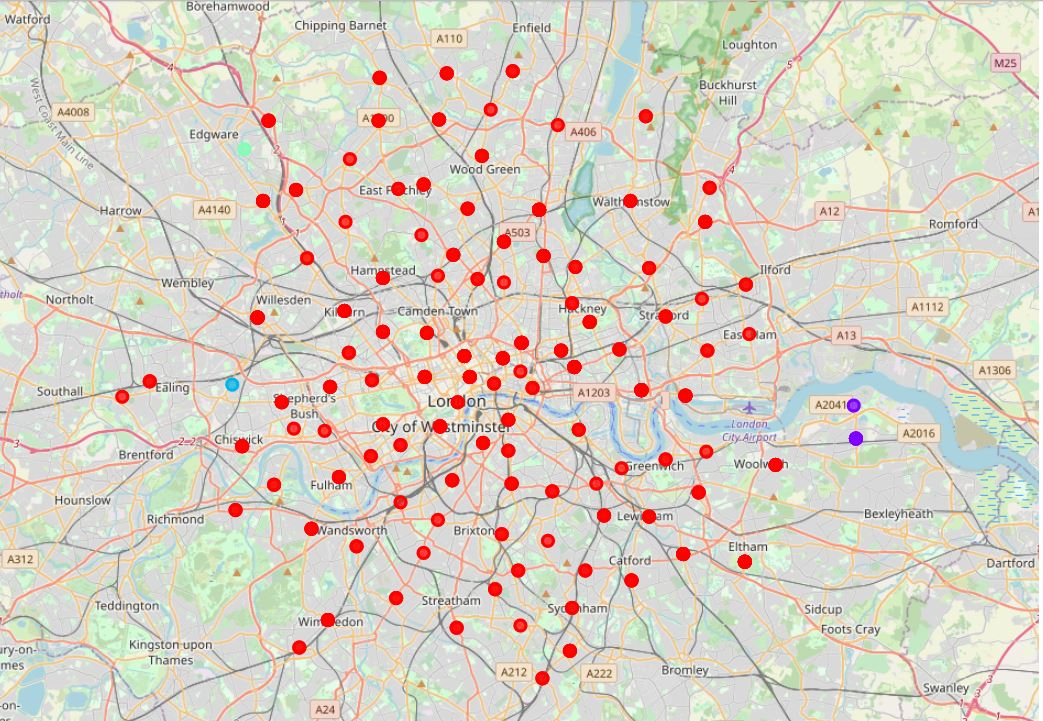

#### 4.6.2 Creating a Visualization of Toronto

In [ ]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Borough'], toronto_data['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

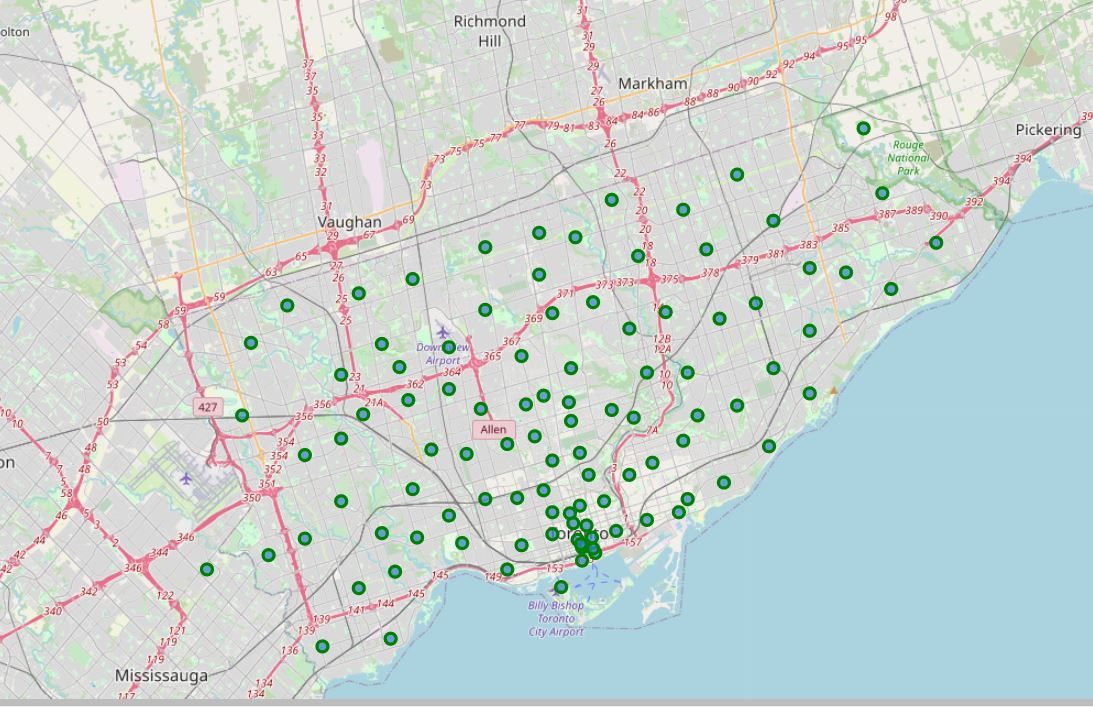

### 4.7 Exploring the Toronto and London neighborhoods

### 4.7.1 Exploring the venues in London neighborhoods
We will use the Foursquare API to get venue and venue categories in each neighborhood in London. A similar process will be done for the Toronto neighborhood

In [31]:
# define Foursquare API credentials
CLIENT_ID = 'WE1URFXYXKYXZAA5RR2NJLRDLJEDDEUWNSZYEWFR2OOACU2B' # your Foursquare ID
CLIENT_SECRET = 'CDA5QTQ1JGW5IWHUP1AKLVGZNYTHF1MUJBYCP5EDDNM4VKBO' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WE1URFXYXKYXZAA5RR2NJLRDLJEDDEUWNSZYEWFR2OOACU2B
CLIENT_SECRET:CDA5QTQ1JGW5IWHUP1AKLVGZNYTHF1MUJBYCP5EDDNM4VKBO


We create a function that will help us explore the venues in each neighborhood alongside with their categories which will be improtant later for analysis

In [32]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

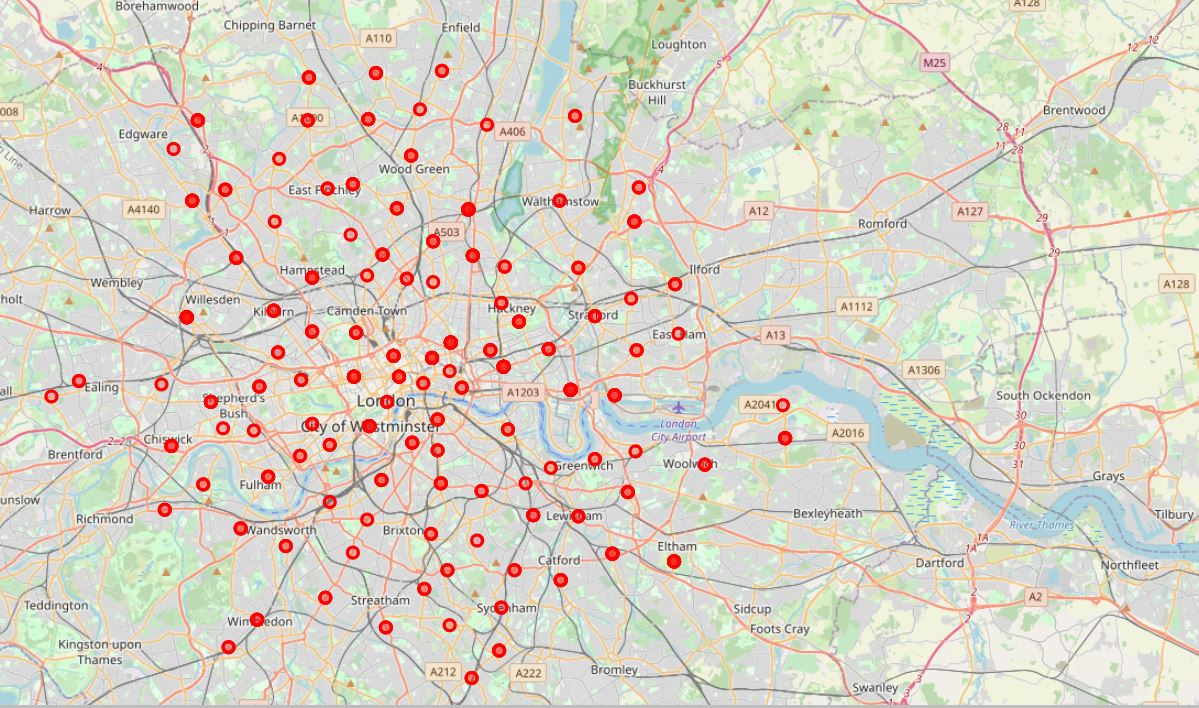run the above function on each neighborhood and create a new dataframe called london_venues.

In [ ]:
 london_venues = getNearbyVenues(names=london_merged['borough'],
                                   latitudes=london_merged['latitude'],
                                   longitudes=london_merged['longitude']
                                  )
    

Here is the resulting dataframe after the getNearbyVenues function that we created

In [34]:
print(london_venues.shape)
london_venues.head()

(10504, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Bexley, Greenwich",51.49245,0.12127,Lesnes Abbey,51.489526,0.125839,Historic Site
1,"Bexley, Greenwich",51.49245,0.12127,Sainsbury's,51.492826,0.120524,Supermarket
2,"Bexley, Greenwich",51.49245,0.12127,Lidl,51.496152,0.118417,Supermarket
3,"Bexley, Greenwich",51.49245,0.12127,Abbey Wood Railway Station (ABW),51.490825,0.123432,Train Station
4,"Bexley, Greenwich",51.49245,0.12127,Bean @ Work,51.491172,0.120649,Coffee Shop


In [35]:
print ('There are {} uniques venue vategories'. format(len(london_venues['Venue Category'].unique())))


There are 293 uniques venue vategories


we can start to see how incredibly diverse that London is with 293 venue categories. Now let us see how many venues are in each neighborhood.

In [36]:
london_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Barnet,561,561,561,561,561,561
"Barnet, Brent, Camden",4,4,4,4,4,4
Bexley,23,23,23,23,23,23
"Bexley, Greenwich",7,7,7,7,7,7
"Bexley, Greenwich",6,6,6,6,6,6
Brent,145,145,145,145,145,145
"Brent, Camden",32,32,32,32,32,32
"Brent, Ealing",9,9,9,9,9,9
"Brent, Harrow",89,89,89,89,89,89


### 4.7.2 Analyze Each Neighborhood in London

In [37]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Neighborhood'] = london_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [london_onehot.columns[-1]] + list(london_onehot.columns[:-1])
london_onehot = london_onehot[fixed_columns]

london_onehot.head()


,Neighborhood,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,"Bexley, Greenwich",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Bexley, Greenwich",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Bexley, Greenwich",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Bexley, Greenwich",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Bexley, Greenwich",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


After the one hot encoding which should help with our clustering efforts later on, we will group the neighborhoods and calculate the mean venue categories value in each neighborhood.

In [61]:
#Venue categories mean value
london_grouped = london_onehot.groupby('Neighborhood').mean().reset_index()
london_grouped.head(10)


,Neighborhood,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
0,Barnet,0.0,0.0,0.00713,0.0,0.0,0.0,0.00713,0.000000,0.000000,...,0.00713,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,"Barnet, Brent, Camden",0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,Bexley,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,"Bexley, Greenwich",0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,"Bexley, Greenwich",0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
5,Brent,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.00000,0.048276,0.0,0.000000,0.0,0.013793,0.0,0.0,0.0,0.0
6,"Brent, Camden",0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.0,0.031250,0.0,0.0,0.0,0.0
7,"Brent, Ealing",0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.00000,0.111111,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
8,"Brent, Harrow",0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.033708,0.022472,...,0.00000,0.000000,0.0,0.022472,0.0,0.000000,0.0,0.0,0.0,0.0
9,Bromley,0.0,0.0,0.00000,0.0,0.0,0.0,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [43]:
#checking for african/caribbean restaurants
london_onehot.loc[london_onehot['African Restaurant'] != 0]

,Neighborhood,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Arcade,Arepa Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,...,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Xinjiang Restaurant,Yoga Studio,Zoo Exhibit
5610,Westminster,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5675,Westminster,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,Hammersmith and Fulham,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9511,Croydon,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,Hammersmith and Fulham,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10490,Hammersmith and Fulham,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now, print each neighborhood along with the top 5 most common venues

In [ ]:
num_lon_top_venues = 5

for hood in london_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = london_grouped[london_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

we would like to display the top 10 venues for each neighborhood in a pandas dataframe, but before we can do that we create a function to sort the venues in a descending order

In [47]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

with the function we create dataframe that displays the top venue categories in london


In [48]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_lon_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_lon_venues_sorted['Neighborhood'] = london_grouped['Neighborhood']

for ind in np.arange(london_grouped.shape[0]):
    neighborhoods_lon_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

neighborhoods_lon_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet,Coffee Shop,Café,Grocery Store,Italian Restaurant,Pub,Bus Stop,Supermarket,Sushi Restaurant,Pharmacy,Turkish Restaurant
1,"Barnet, Brent, Camden",Bus Station,Gym / Fitness Center,Clothing Store,Supermarket,Zoo Exhibit,Fish & Chips Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant
2,Bexley,Supermarket,Historic Site,Coffee Shop,Convenience Store,Train Station,Park,Bus Stop,Construction & Landscaping,Golf Course,Fast Food Restaurant
3,"Bexley, Greenwich",Sports Club,Convenience Store,Park,Historic Site,Construction & Landscaping,Golf Course,Bus Stop,Flower Shop,Food & Drink Shop,Food Court
4,"Bexley, Greenwich",Supermarket,Train Station,Convenience Store,Coffee Shop,Historic Site,Fish & Chips Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant


### 4.7.3 Exploring the venues in Toronto neighborhoods
we start by using the function getNearbyVenues to get the venues in the Toronto neighborhoods

In [ ]:
toronto_venues = getNearbyVenues(names=toronto_data['Neighborhood'],
                                   latitudes=toronto_data['Latitude'],
                                   longitudes=toronto_data['Longitude']
                                  )

Now lets put it in pandas dataframe and also check the shape

In [51]:
print(toronto_venues.shape)
toronto_venues.head()

(2139, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
3,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


We group the Toronto venues data by neighborhoods counting the each unique category returned

In [52]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,5,5,5,5,5,5
"Alderwood, Long Branch",7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",21,21,21,21,21,21
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",22,22,22,22,22,22
...,...,...,...,...,...,...
"Willowdale, Willowdale West",5,5,5,5,5,5
Woburn,4,4,4,4,4,4
Woodbine Heights,8,8,8,8,8,8


 Finding out the number of unique categories curated from the returned venues

In [53]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 274 uniques categories.


### 4.7.4 Anlalyze Each Toronto Neighborhood
Afer successfully retrieving venues from the Toronto data, we anaylyze each neighborhood

In [54]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We are going to group rows by group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [55]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"Willowdale, Willowdale West",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,Woburn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,Woodbine Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,York Mills West,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
#checking for african/caribbean restaurants
toronto_grouped.loc[toronto_grouped['Caribbean Restaurant'] != 0]

,Neighborhood,Yoga Studio,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,...,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store
12,Cedarbrae,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
15,Church and Wellesley,0.026667,0.0,0.013333,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.013333,0.0,0.000000,0.0,0.0
22,Don Mills,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
43,"Kensington Market, Chinatown, Grange Park",0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.054054,0.0,0.040541,0.0,0.013514,0.0,0.0
57,"Northwood Park, York University",0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
73,"St. James Town, Cabbagetown",0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
80,"The Danforth West, Riverdale",0.023256,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023256,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0


In [57]:
toronto_grouped.shape

(96, 274)

In [58]:
num_top_venues = 5

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0  Latin American Restaurant   0.2
1             Breakfast Spot   0.2
2                     Lounge   0.2
3               Skating Rink   0.2
4             Clothing Store   0.2


----Alderwood, Long Branch----
            venue  freq
0     Pizza Place  0.29
1             Gym  0.14
2  Sandwich Place  0.14
3             Pub  0.14
4     Coffee Shop  0.14


----Bathurst Manor, Wilson Heights, Downsview North----
                       venue  freq
0                Coffee Shop  0.10
1                       Bank  0.10
2         Chinese Restaurant  0.05
3              Shopping Mall  0.05
4  Middle Eastern Restaurant  0.05


----Bayview Village----
                 venue  freq
0  Japanese Restaurant  0.25
1                 Café  0.25
2   Chinese Restaurant  0.25
3                 Bank  0.25
4                Motel  0.00


----Bedford Park, Lawrence Manor East----
                     venue  freq
0              Coffee Shop  0.09
1           Sandw

 we create a new dataframe to display the top 10 venues for each Toronto neighborhood 

In [59]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(10)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Latin American Restaurant,Skating Rink,Breakfast Spot,Clothing Store,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
1,"Alderwood, Long Branch",Pizza Place,Pharmacy,Gym,Sandwich Place,Coffee Shop,Pub,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Frozen Yogurt Shop,Shopping Mall,Bridal Shop,Sandwich Place,Diner,Restaurant,Deli / Bodega,Supermarket
3,Bayview Village,Café,Japanese Restaurant,Chinese Restaurant,Bank,Women's Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Italian Restaurant,Coffee Shop,Grocery Store,Thai Restaurant,Comfort Food Restaurant,Juice Bar,Butcher,Restaurant,Café
5,Berczy Park,Coffee Shop,Farmers Market,Restaurant,Beer Bar,Seafood Restaurant,Cocktail Bar,Bakery,Cheese Shop,Shopping Mall,Sporting Goods Shop
6,"Birch Cliff, Cliffside West",College Stadium,Skating Rink,General Entertainment,Café,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
7,"Brockton, Parkdale Village, Exhibition Place",Café,Coffee Shop,Breakfast Spot,Nightclub,Pet Store,Stadium,Burrito Place,Restaurant,Climbing Gym,Performing Arts Venue
8,"Business reply mail Processing Centre, South C...",Skate Park,Light Rail Station,Butcher,Recording Studio,Auto Workshop,Burrito Place,Garden,Garden Center,Farmers Market,Fast Food Restaurant
9,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Boutique,Airport Terminal,Rental Car Location,Coffee Shop,Plane,Boat or Ferry,Sculpture Garden,Harbor / Marina


## 4.8 Building Model to Cluster Neighborhoods
We will use the k means clustering technique to cluster the neighborhods into five distinct groups based on neighbood common venues


### 4.8.1 Clustering th City of London

In [90]:
# set number of clusters
kclusters_lon = 5

london_grouped_clustering = london_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans_london = KMeans(n_clusters=kclusters_lon, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_london.labels_[0:10]

array([0, 4, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int32)

In [98]:
# add clustering labels
# neighborhoods_lon_venues_sorted.insert(0, 'Cluster Labels', kmeans_london.labels_)

lon_cluster_merged= london_merged
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
lon_cluster_merged = london_merged.join(neighborhoods_lon_venues_sorted.set_index('Neighborhood'), on='borough')

# check the last columns!
lon_cluster_merged.head()

,borough,town,post_code,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bexley, Greenwich",LONDON,SE2,51.49245,0.12127,1,Supermarket,Train Station,Convenience Store,Coffee Shop,Historic Site,Fish & Chips Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant
1,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",51.51324,-0.26746,2,Grocery Store,Train Station,Breakfast Spot,Park,Indian Restaurant,Dessert Shop,Exhibit,Dance Studio,Food Stand,Food Court
6,City,LONDON,EC3,51.51200,-0.08058,0,Hotel,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Pub,Restaurant,Sandwich Place,Wine Bar,Scenic Lookout,French Restaurant
7,Westminster,LONDON,WC2,51.51651,-0.11968,0,Hotel,Coffee Shop,Café,Sandwich Place,Pub,Italian Restaurant,Theater,Restaurant,Burger Joint,French Restaurant
9,Bromley,LONDON,SE20,51.41009,-0.05683,0,Supermarket,Convenience Store,Hotel,Grocery Store,Fast Food Restaurant,Park,Pub,Gastropub,Bistro,Sandwich Place


In [101]:
# we drop any missing data from the dataframe and then we can proceed to visualizing the diffenrent neighborhood clusters on the map-this is a markdown
lon_cluster_merged.dropna
lon_cluster_merged.head()

,borough,town,post_code,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Bexley, Greenwich",LONDON,SE2,51.49245,0.12127,1,Supermarket,Train Station,Convenience Store,Coffee Shop,Historic Site,Fish & Chips Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant
1,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",51.51324,-0.26746,2,Grocery Store,Train Station,Breakfast Spot,Park,Indian Restaurant,Dessert Shop,Exhibit,Dance Studio,Food Stand,Food Court
6,City,LONDON,EC3,51.51200,-0.08058,0,Hotel,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Pub,Restaurant,Sandwich Place,Wine Bar,Scenic Lookout,French Restaurant
7,Westminster,LONDON,WC2,51.51651,-0.11968,0,Hotel,Coffee Shop,Café,Sandwich Place,Pub,Italian Restaurant,Theater,Restaurant,Burger Joint,French Restaurant
9,Bromley,LONDON,SE20,51.41009,-0.05683,0,Supermarket,Convenience Store,Hotel,Grocery Store,Fast Food Restaurant,Park,Pub,Gastropub,Bistro,Sandwich Place


### 4.8.3 Visualizing the clusterd map of london

In [ ]:
london_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lon_cluster_merged['latitude'], lon_cluster_merged['longitude'], lon_cluster_merged['borough'], lon_cluster_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(london_map_clusters)
       
london_map_clusters

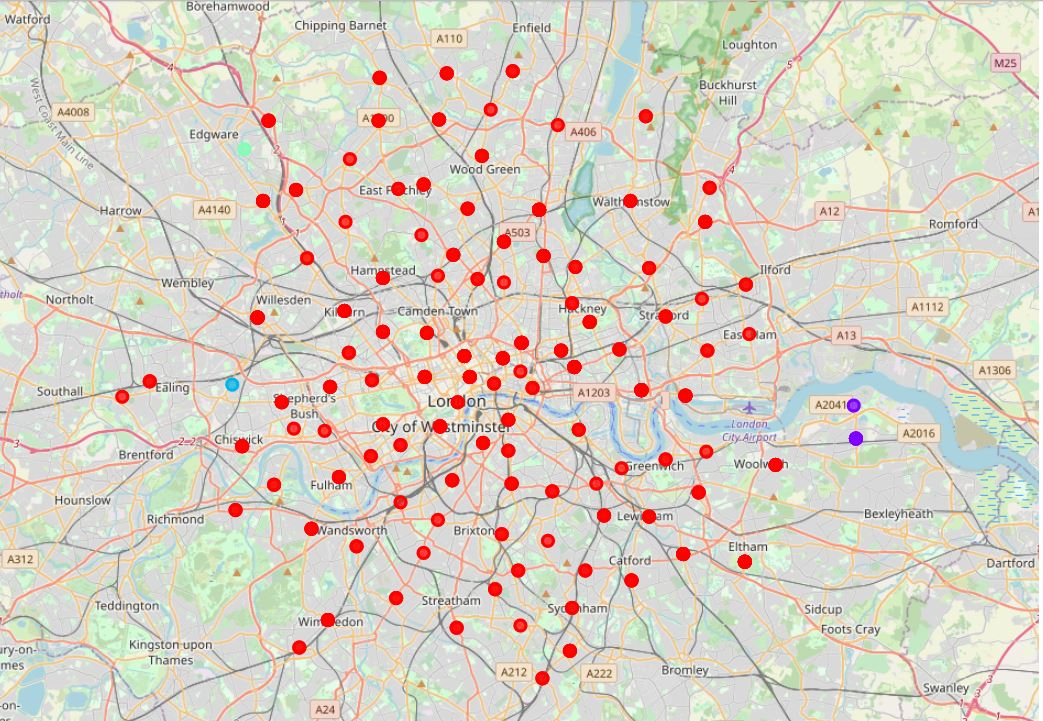

### 4.8.4 Clustering the City of Toronto

In [74]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [75]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')



# check the last columns!
toronto_merged.head()

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Park,Food & Drink Shop,Women's Store,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Intersection,Pizza Place,Coffee Shop,Hockey Arena,Portuguese Restaurant,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,Coffee Shop,Park,Pub,Bakery,Breakfast Spot,Café,Theater,Hotel,Chocolate Shop,Spa
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,Clothing Store,Women's Store,Coffee Shop,Event Space,Furniture / Home Store,Gift Shop,Boutique,Accessories Store,Vietnamese Restaurant,Convenience Store
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.0,Coffee Shop,Yoga Studio,Sushi Restaurant,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Restaurant,Café,Portuguese Restaurant


In [76]:
toronto_merged=toronto_merged.dropna()
toronto_merged

,Postcode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,0.0,Park,Food & Drink Shop,Women's Store,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant
1,M4A,North York,Victoria Village,43.725882,-79.315572,1.0,Intersection,Pizza Place,Coffee Shop,Hockey Arena,Portuguese Restaurant,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1.0,Coffee Shop,Park,Pub,Bakery,Breakfast Spot,Café,Theater,Hotel,Chocolate Shop,Spa
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1.0,Clothing Store,Women's Store,Coffee Shop,Event Space,Furniture / Home Store,Gift Shop,Boutique,Accessories Store,Vietnamese Restaurant,Convenience Store
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1.0,Coffee Shop,Yoga Studio,Sushi Restaurant,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Restaurant,Café,Portuguese Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944,1.0,River,Pool,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160,1.0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Pub,Men's Store,Mediterranean Restaurant,Hotel,Yoga Studio
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C...",43.662744,-79.321558,1.0,Skate Park,Light Rail Station,Butcher,Recording Studio,Auto Workshop,Burrito Place,Garden,Garden Center,Farmers Market,Fast Food Restaurant
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509,3.0,Baseball Field,Construction & Landscaping,Women's Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant


### 4.8.5 Visualizing the clusterd map of toronto 

In [ ]:
# create map
toronto_map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(toronto_map_clusters)
       
toronto_map_clusters

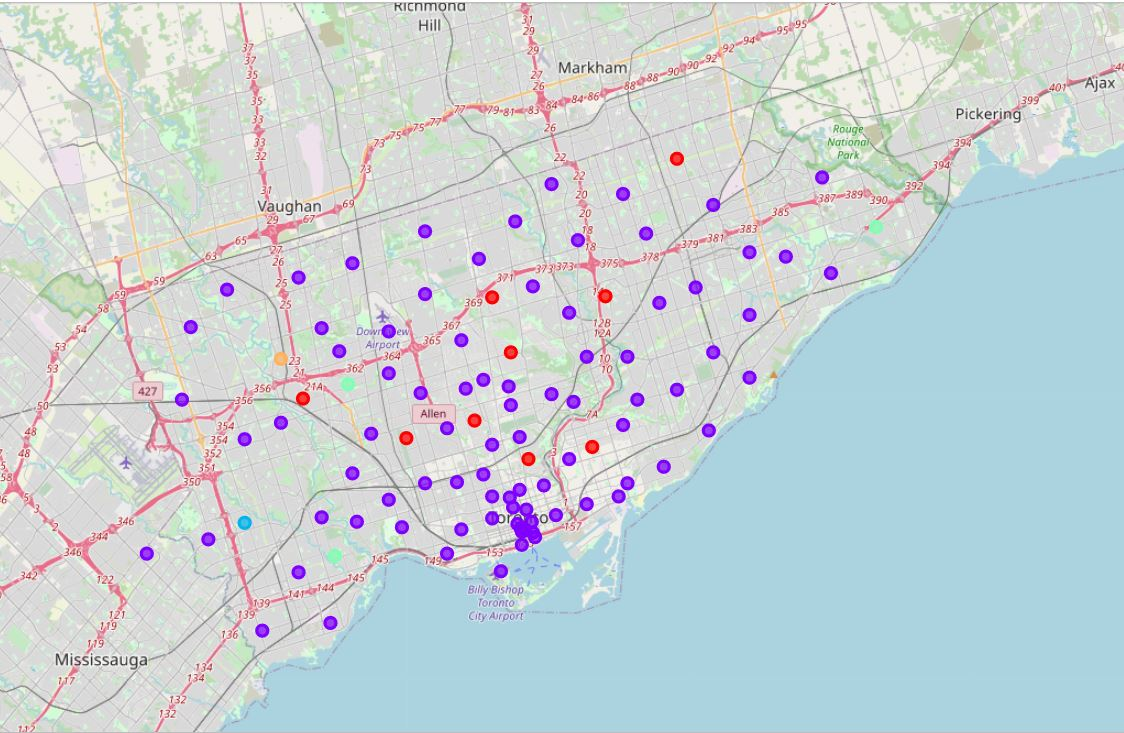

 ### 4.9 Examining Neighborhood Clusters
we tranform the neighborhood clusters into a datframe where we can closely examine each cluster and take notice of the trends on display

### 4.9.1 London Neighborhood Clusters

#### London Cluster 1

In [115]:
lon_cluster_merged.loc[lon_cluster_merged['Cluster Labels'] == 0, lon_cluster_merged.columns[[1] + list(range(5, lon_cluster_merged.shape[1]))]]

,town,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,LONDON,0,Hotel,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Pub,Restaurant,Sandwich Place,Wine Bar,Scenic Lookout,French Restaurant
7,LONDON,0,Hotel,Coffee Shop,Café,Sandwich Place,Pub,Italian Restaurant,Theater,Restaurant,Burger Joint,French Restaurant
9,LONDON,0,Supermarket,Convenience Store,Hotel,Grocery Store,Fast Food Restaurant,Park,Pub,Gastropub,Bistro,Sandwich Place
10,LONDON,0,Coffee Shop,Pub,Café,Food Truck,Vietnamese Restaurant,Gym / Fitness Center,Italian Restaurant,Park,Cocktail Bar,Breakfast Spot
12,LONDON,0,Coffee Shop,Pub,Café,Food Truck,Vietnamese Restaurant,Gym / Fitness Center,Italian Restaurant,Park,Cocktail Bar,Breakfast Spot
...,...,...,...,...,...,...,...,...,...,...,...,...
522,LONDON,0,Café,Coffee Shop,Grocery Store,Pub,Seafood Restaurant,Pharmacy,Bar,Bakery,Metro Station,Park
523,"LONDON, WOODFORD GREEN",0,Hotel,Café,Theater,Pub,Plaza,Garden,Monument / Landmark,Restaurant,Art Gallery,Steakhouse
526,LONDON,0,Coffee Shop,Café,Grocery Store,Italian Restaurant,Pub,Bus Stop,Supermarket,Sushi Restaurant,Pharmacy,Turkish Restaurant
527,LONDON,0,Pub,Grocery Store,Bus Stop,Coffee Shop,Indian Restaurant,Historic Site,Park,Café,Clothing Store,Construction & Landscaping


#### London Cluster 2

In [114]:
lon_cluster_merged.loc[lon_cluster_merged['Cluster Labels'] == 1, lon_cluster_merged.columns[[1] + list(range(5, lon_cluster_merged.shape[1]))]]

,town,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,LONDON,1,Supermarket,Train Station,Convenience Store,Coffee Shop,Historic Site,Fish & Chips Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant
45,"BEXLEYHEATH, LONDON",1,Supermarket,Historic Site,Coffee Shop,Convenience Store,Train Station,Park,Bus Stop,Construction & Landscaping,Golf Course,Fast Food Restaurant
124,LONDON,1,Supermarket,Historic Site,Coffee Shop,Convenience Store,Train Station,Park,Bus Stop,Construction & Landscaping,Golf Course,Fast Food Restaurant
167,"LONDON, WELLING",1,Sports Club,Convenience Store,Park,Historic Site,Construction & Landscaping,Golf Course,Bus Stop,Flower Shop,Food & Drink Shop,Food Court
291,"LONDON, SIDCUP",1,Supermarket,Historic Site,Coffee Shop,Convenience Store,Train Station,Park,Bus Stop,Construction & Landscaping,Golf Course,Fast Food Restaurant
458,"LONDON, ERITH",1,Sports Club,Convenience Store,Park,Historic Site,Construction & Landscaping,Golf Course,Bus Stop,Flower Shop,Food & Drink Shop,Food Court
506,LONDON,1,Supermarket,Historic Site,Coffee Shop,Convenience Store,Train Station,Park,Bus Stop,Construction & Landscaping,Golf Course,Fast Food Restaurant


#### London Cluster 3

In [113]:
lon_cluster_merged.loc[lon_cluster_merged['Cluster Labels'] == 2, lon_cluster_merged.columns[[1] + list(range(5, lon_cluster_merged.shape[1]))]]

,town,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,LONDON,2,Grocery Store,Train Station,Breakfast Spot,Park,Indian Restaurant,Dessert Shop,Exhibit,Dance Studio,Food Stand,Food Court


#### London Cluster 4

In [112]:
lon_cluster_merged.loc[lon_cluster_merged['Cluster Labels'] == 3, lon_cluster_merged.columns[[1] + list(range(5, lon_cluster_merged.shape[1]))]]

,town,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
378,"HARROW, STANMOREEDGWARE, LONDON",3,Gym,Metro Station,Bakery,Food Stand,Food Court,Food & Drink Shop,Flower Shop,Flea Market,Fishing Store,Event Space


#### London Cluster 5

In [111]:
lon_cluster_merged.loc[lon_cluster_merged['Cluster Labels'] == 4, lon_cluster_merged.columns[[1] + list(range(5, lon_cluster_merged.shape[1]))]]

,town,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
121,LONDON,4,Bus Station,Gym / Fitness Center,Clothing Store,Supermarket,Zoo Exhibit,Fish & Chips Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant


### 4.9.2 Toronto Neighborhood Clusters

#### Toronto Cluster 1

In [88]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,North York,0.0,Park,Food & Drink Shop,Women's Store,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant
21,York,0.0,Park,Women's Store,Pool,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
35,East York,0.0,Park,Convenience Store,Intersection,Women's Store,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
61,Central Toronto,0.0,Park,Swim School,Bus Line,Women's Store,Donut Shop,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore
64,York,0.0,Park,Women's Store,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
66,North York,0.0,Park,Convenience Store,Women's Store,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore
68,Central Toronto,0.0,Trail,Park,Sushi Restaurant,Jewelry Store,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
85,Scarborough,0.0,Park,Playground,Bakery,Women's Store,Drugstore,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
91,Downtown Toronto,0.0,Park,Trail,Playground,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant


#### Toronto Cluster 2

In [87]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,North York,1.0,Intersection,Pizza Place,Coffee Shop,Hockey Arena,Portuguese Restaurant,Donut Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
2,Downtown Toronto,1.0,Coffee Shop,Park,Pub,Bakery,Breakfast Spot,Café,Theater,Hotel,Chocolate Shop,Spa
3,North York,1.0,Clothing Store,Women's Store,Coffee Shop,Event Space,Furniture / Home Store,Gift Shop,Boutique,Accessories Store,Vietnamese Restaurant,Convenience Store
4,Downtown Toronto,1.0,Coffee Shop,Yoga Studio,Sushi Restaurant,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Restaurant,Café,Portuguese Restaurant
6,Scarborough,1.0,Fast Food Restaurant,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Hardware Store
...,...,...,...,...,...,...,...,...,...,...,...,...
97,Downtown Toronto,1.0,Coffee Shop,Café,Hotel,Japanese Restaurant,Restaurant,Gym,American Restaurant,Asian Restaurant,Deli / Bodega,Steakhouse
98,Etobicoke,1.0,River,Pool,Women's Store,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
99,Downtown Toronto,1.0,Coffee Shop,Sushi Restaurant,Japanese Restaurant,Gay Bar,Restaurant,Pub,Men's Store,Mediterranean Restaurant,Hotel,Yoga Studio
100,East Toronto,1.0,Skate Park,Light Rail Station,Butcher,Recording Studio,Auto Workshop,Burrito Place,Garden,Garden Center,Farmers Market,Fast Food Restaurant


#### Toronto Cluster 3

In [86]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Etobicoke,2.0,Print Shop,Women's Store,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dessert Shop


#### Toronto Cluster 4

In [85]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Scarborough,3.0,Construction & Landscaping,Bar,Women's Store,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
49,North York,3.0,Park,Bakery,Construction & Landscaping,Women's Store,Dumpling Restaurant,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore
101,Etobicoke,3.0,Baseball Field,Construction & Landscaping,Women's Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant


#### Toronto Cluster 5

In [84]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,North York,4.0,Baseball Field,Dumpling Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Women's Store,Fast Food Restaurant


## 5.0 Results and Discussion

This project gave a lot of insight into the cultural dynamics of both cities. If there is one thing for sure that this project told is the fact that both Toronto and London are incredibly diverse. The initial assertion made about the uncanny similarity between the two cities was proven true. While there is undoubtedly afro-Caribbean populations in both cities, the results showed that there are very limited afro-caribbean venues. For travel enthusiasts or Toronto natives that will like to specifically immerse themselves in the afro-caribbean culture of London upon their visit, they can go to the Hammersmith and Fulham as well as Croydon neighborhoods as they have some afro-caribbean restaurants and food markets. Similarly, tourists and London natives that will like to explore afro-caribbean Toronto neighborhoods should make the trek to the Northwood Park and York university neighborhoods where there are a couple of Caribbean restaurants with a high attendance frequency.


While the main purpose of this project was to discover Afro-Caribbean venues that existed in both cities, we discovered that are other cultural hubs within the city of London and Toronto. For example in London, there are several Asian cuisine venues that cater to Filipino, Vietnamese and Chinese delights to its patrons. London as an internationally renowned city, see millions of tourist visit the city each year to explore it. This claim is obvious from the results we got from the analysis showing that historic sites are some of the most frequented venues across multiple London neighborhood clusters. The variety of venues in London is astonishing. Also one can assume that London is a city on a move with several coffee shops and food trucks with immense public transport that shuffles people about the city. More on Toronto, we discovered that the city also offers a variety of Asian cuisines with different sushi and dumpling shops. We can also observe the pockets of middle eastern culture as Doner and Falafel restaurants are very popular.

A major distinction that we observed between the two cities was although both cities are considered international, London is enriched with more historic sites when compared to Toronto. Looking at the resulting clusters neither tourists nor natives of Toronto tend to go to historic sights with high regularity.


## 6.0 Conclusion

While it is always exiciting to undertake projects such as this, analysing citeis, it can be difficult to understand the underlying meaning of all the results especially if you are not a local to the city you are building a model on. Nevertheless, the resulting insights can be regarded as helpful. We were able to clearly answer to the question that we posed seeing that the two cities have some amazing similarities with a degree of uniquesness that make them both special. the process that led to these conclusions involved explored both the cities based on their postal codes and then extrapolated the common venues present in each of the neighbourhoods finally concluding with clustering similar neighbouhoods together.A major shortcoming of this project was that explicit neighborhood demographic data was not used and that assumptions were made based on the patronange of common venues.Needless to say, London and Toronto are cities that have a lot offer in terms of cuisine and cultural diversity.

## 7.0 References
1. [Foursquare API](https://foursquare.com/)
2. [The Battle of Neighbourhood — My London’s Perspective by Dayo John](https://medium.com/@oludayo.oguntoyinbo/the-battle-of-neighbourhood-my-londons-perspective-d363163771e0)
3. [Wikipedia London Data](https://en.wikipedia.org/wiki/List_of_areas_of_London)
4. [Wikipedia Toronto Data](https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)

* This is done as part of the IBM Data Science Professional certificate Applied Capstone Project